In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\davidl\AppData\Local\Temp\ipykernel_31388\1536321615.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wcss_value = df.groupby('clust').apply(lambda x: ((x - x.mean())**2).sum().sum()).sum()
C:\Users\davidl\AppData\Local\Temp\ipykernel_31388\1536321615.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wcss_value = df.groupby('clust').apply(lambda x: ((x - x.mean())**2).sum().sum()).sum()
C:\U

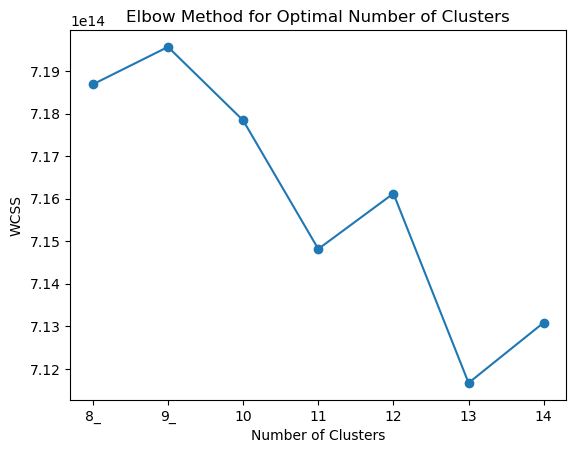

In [2]:
# List of Files to grab silhouette scores from
PREFIX_PATH = "C:/Users/davidl/OneDrive - ULTRA MOBILE/Desktop/dli_code/RetSeg/output/114/"

FILE_LIST = ["jun_hclust8_10p_mdl_output.csv", "jun_hclust9_10p_mdl_output.csv","jun_hclust10_10p_mdl_output.csv", "jun_hclust11_10p_mdl_output.csv", "jun_hclust12_10p_mdl_output.csv", 
             "jun_hclust13_10p_mdl_output.csv", "jun_hclust14_10p_mdl_output.csv"]

# Initialize lists to store WCSS and silhouette scores
wcss = []
silhouette_scores = []
file_labels = []

# Loop through each file and calculate WCSS and silhouette score
for file in FILE_LIST:
    df = pd.read_csv(PREFIX_PATH + file)
    silhouette_score = df['silhouette_score'].iloc[0]  # Assuming the silhouette score is the same for all rows
    silhouette_scores.append(silhouette_score)
    df.drop(columns = ["silhouette_score"], inplace = True)
    # Calculate WCSS for the current number of clusters
    wcss_value = df.groupby('clust').apply(lambda x: ((x - x.mean())**2).sum().sum()).sum()
    wcss.append(wcss_value)
    file_labels.append(file[10:12])  # Extract the 11th and 12th characters from the file name

# Plot the WCSS values to find the elbow point
plt.plot(file_labels, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Save the plot as a JPG file
plt.savefig('elbow_method_plot.jpg', format='jpg')

plt.show()

In the context of clustering, a lower WCSS (Within-Cluster Sum of Squares) value is generally better. Here's why:

Lower WCSS: Indicates that the data points within each cluster are closer to the cluster centroid, meaning the clusters are more compact and well-defined. This suggests that the clustering algorithm has effectively grouped similar data points together12.

Higher WCSS: Indicates that the data points within each cluster are more spread out from the cluster centroid, meaning the clusters are less compact and potentially less distinct. This can suggest that the clustering algorithm has not grouped the data points as effectively23.

What It Means:
Low WCSS: Clusters are tight and well-separated, which is typically desirable in clustering tasks. However, if WCSS is too low, it might indicate overfitting, where the model is too closely tailored to the specific dataset and may not generalize well to new data1.
High WCSS: Clusters are more dispersed, which might indicate that the chosen number of clusters is too low, or the clustering algorithm hasn't effectively captured the underlying structure of the data2.
When using the elbow method, you plot the WCSS against the number of clusters and look for the "elbow" point where the rate of decrease sharply changes. This point suggests a balance between having a manageable number of clusters and minimizing the variance within them1.

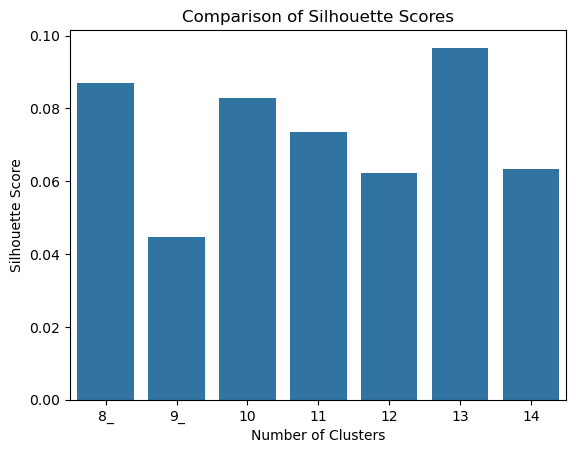

In [3]:
# Create a DataFrame for plotting
data = pd.DataFrame({
    'File': file_labels,
    'Silhouette Score': silhouette_scores
})

# Create a bar plot using seaborn
sns.barplot(x='File', y='Silhouette Score', data=data)
plt.title('Comparison of Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

What is a Silhouette Score?
The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to +1:  

+1: Indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.  
0: Indicates that the object is on or very close to the decision boundary between two neighboring clusters.  
-1: Indicates that the object might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it was assigned to12.  

High vs. Low Silhouette Scores  
High Silhouette Scores: A high silhouette score (close to +1) indicates that the clusters are well-separated and the objects are appropriately clustered. This means the clustering configuration is likely effective.  
Low Silhouette Scores: A low silhouette score (close to -1) suggests that the clusters are overlapping or poorly defined, and the objects might be misclassified.  

Practical Implications
High Scores: Indicate good clustering quality, where data points are well-clustered and distinct from other clusters.  
Low Scores: Suggest that the clustering algorithm might need adjustment, such as changing the number of clusters or using a different clustering method.  